<a href="https://colab.research.google.com/github/dhruvipatel14/Affinity-analysis/blob/master/BuyAffinity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello, My name is Dhruvi.
Here I have given my approch to solve the recommendation system using unlabled data.

Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dhruvipatel14/Affinity-analysis/master/BuyAffinity_Train.txt',sep = '\t')
train_df = pd.DataFrame(train_data)
train_df.head(5)

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,-3918676258,316195953,6176861823,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,-6837090439,1378635942,-9031507610,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,6881163164,-9921889287,-5610051842,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,-6014104498,6550322883,-4697085930,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,-9755731483,759031103,9984692447,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [4]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dhruvipatel14/Affinity-analysis/master/BuyAffinity_Test.txt',sep = '\t')
test_df = pd.DataFrame(test_data)
test_df.head(5)

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,-3461806391,8178108368,-8674321652,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,-36253473,-6531193961,1849753082,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,5354243488,8053401796,782597920,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,7405036171,-2666864618,-8649240595,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,-6351599280,-2152422738,4768902493,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


Getting insights about size and datatypes of features

In [5]:
print(train_df.shape)
print(test_df.shape)

(101180, 24)
(19913, 23)


In [6]:
train_df.dtypes

Index      int64
F1       float64
F2       float64
F3       float64
F4       float64
F5         int64
F6         int64
F7         int64
F8         int64
F9         int64
F10        int64
F11        int64
F12        int64
F13        int64
F14        int64
F15       object
F16       object
F17        int64
F18        int64
F19        int64
F20        int64
F21        int64
F22        int64
C          int64
dtype: object

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Detailed statistical discription about train data and test data

In [8]:
train_df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Index,101180.000,50590.500,29208.294,1.000,25295.750,50590.500,75885.250,101180.000
F1,101180.000,0.502,0.288,0.000,0.254,0.502,0.754,1.000
F2,101180.000,0.501,0.289,0.000,0.251,0.501,0.752,1.000
F3,101180.000,0.500,0.289,0.000,0.249,0.500,0.750,1.000
F4,101180.000,0.500,0.289,0.000,0.251,0.501,0.749,1.000
F5,101180.000,-29.743,5781.829,-10000.000,-5045.000,-46.000,4978.000,10000.000
F6,101180.000,1.511,5796.594,-10000.000,-5012.000,-11.500,5050.000,10000.000
F7,101180.000,7.939,5765.582,-10000.000,-4979.000,16.500,4962.000,10000.000
F8,101180.000,16.434,5782.805,-10000.000,-4988.000,60.000,5021.000,10000.000
F9,101180.000,9.928,5771.005,-10000.000,-4992.250,22.500,5020.000,10000.000


In [9]:
test_df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
F1,19913.000,0.500,0.287,0.000,0.251,0.499,0.749,1.000
F2,19913.000,0.501,0.288,0.000,0.252,0.500,0.752,1.000
F3,19913.000,0.499,0.289,0.000,0.248,0.498,0.750,1.000
F4,19913.000,0.499,0.288,0.000,0.250,0.498,0.749,1.000
F5,19913.000,15.012,5779.233,-10000.000,-5006.000,32.000,5014.000,10000.000
F6,19913.000,-71.674,5750.864,-10000.000,-5041.000,-5.000,4861.000,9999.000
F7,19913.000,2.344,5769.980,-9999.000,-4941.000,-39.000,5019.000,10000.000
F8,19913.000,11.676,5788.046,-10000.000,-4967.000,-7.000,5027.000,9999.000
F9,19913.000,60.424,5769.787,-10000.000,-4929.000,15.000,5118.000,10000.000
F10,19913.000,-26420967.496,5781200515.120,-9999557651.000,-5074429893.000,-93618563.000,4980296014.000,9998904094.000


Dropping duplicates and null values from dataset if any exits

In [10]:
train_data.drop_duplicates(inplace = True)
train_data.dropna(inplace = True)
train_data.shape

(101180, 24)

Assumptions

*   Dropping F15,F16 as it is date time column and not having any realtion of start day or end day 
*   Dropping F18,F20,F22 as it identical to another columns 



In [11]:
train_data.drop(['F15','F16','F18','F20','F22','Index'],axis=1,inplace=True)
test_data.drop(['F15','F16','F18','F20','F22','Index'],axis=1,inplace=True)

Plotting correlation heatmap to get detailed correlation between all features 

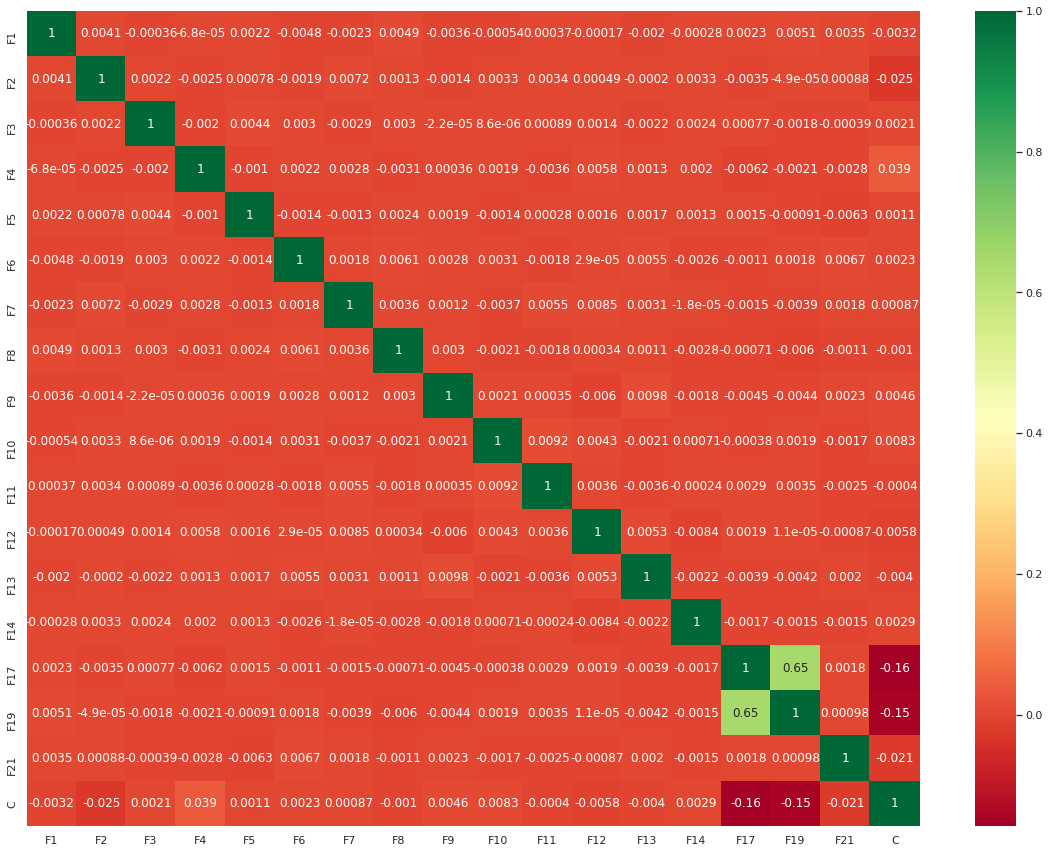

In [12]:
plt.figure(figsize=(20,15))
plt=sns.heatmap(train_data.corr(), annot=True,cmap ='RdYlGn') 

Plotting histogram to check distibution of data

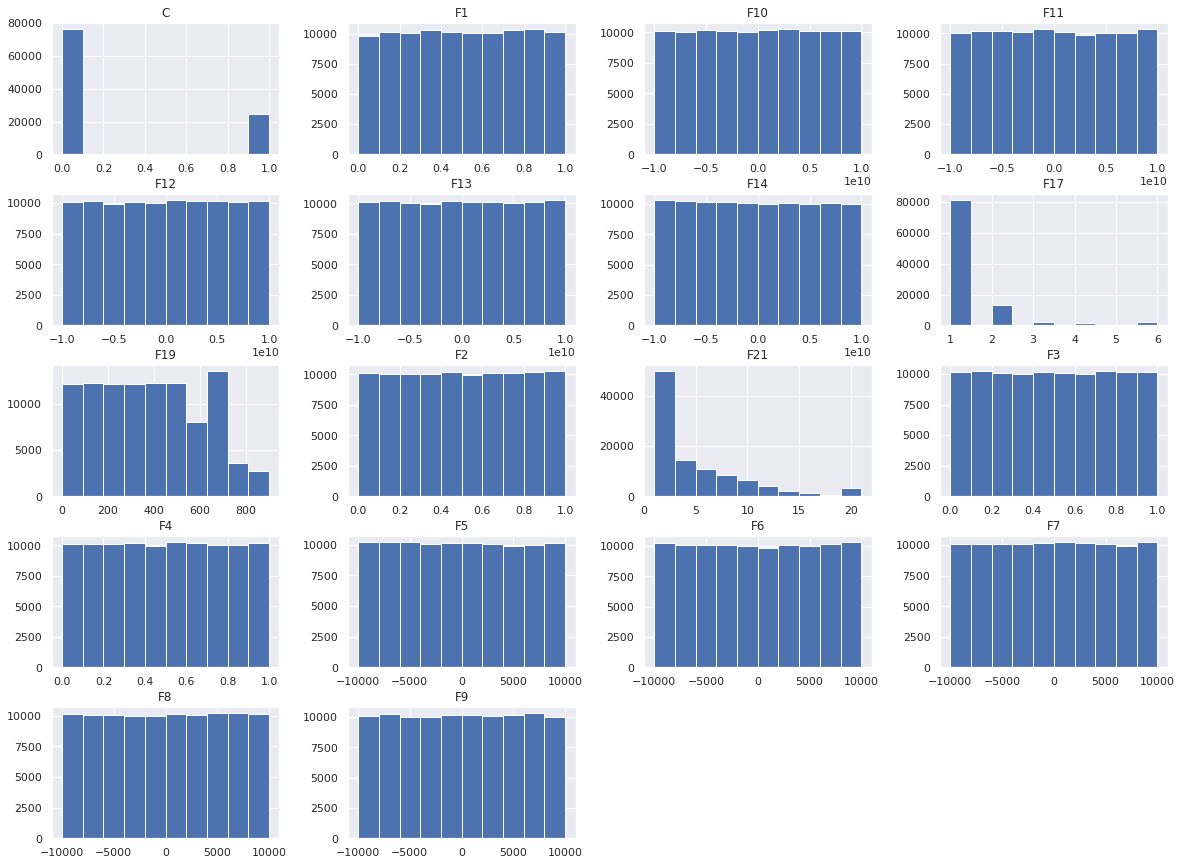

In [13]:
# plt.figure(figsize=(20,15))
plt = train_data.hist(figsize=(20,15))

Plotting density plots to check gaussian distribustion of data

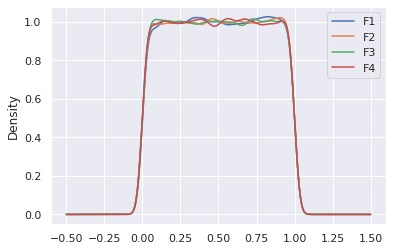

In [14]:
ax = train_data[['F1','F2','F3','F4']].plot.kde()

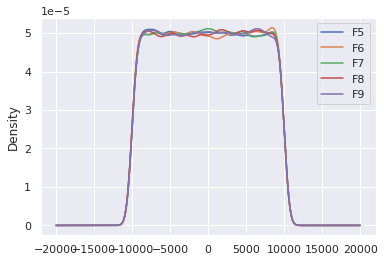

In [15]:
ax = train_data[['F5','F6','F7','F8','F9']].plot.kde()

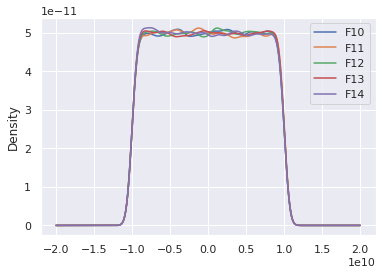

In [16]:
ax = train_data[['F10','F11','F12','F13','F14']].plot.kde()

The target class 'C' is having two classes 0,1.
</br>
From histogram it is visible that it is imbalanced distribution of classes.
</br>
So calculating the class weights and will be using that while training so the model is trained on balanced distribution of classes


In [17]:
train_data['C'].value_counts()

0    76353
1    24827
Name: C, dtype: int64

In [18]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(train_data['C']),
                                             train_data['C']))
print('class_weights',class_weights)
class_weights.sort()

class_weights [0.6625803832200438, 2.0377008901599067]


In [19]:
weights = np.ones(train_data.shape[0], dtype = 'float')
for i, val in enumerate(train_data['C']):
  weights[i] = class_weights[val]

Using standard scaler to scale all the features

In [20]:
def normalization(x):
  scaler = StandardScaler().fit(x)
  x_scaled = scaler.transform(x)
  return x_scaled

In [21]:
features = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F17', 'F19', 'F21']
x = train_data[features]
y = train_data['C']

In [22]:
train_norm = normalization(x)
test_norm = normalization(test_data)

train_norm_df = pd.DataFrame(train_norm,columns=features)
test_norm_df = pd.DataFrame(test_data,columns=test_data.columns)

Splitting dataset in train and validation sets


In [23]:
x_train,x_val,y_train,y_val = train_test_split(train_norm_df,y,random_state = 20,test_size = 0.2)

Splitting train dataset into dependent and independet features

## Approch-1 for training and selecting features


Here I'm creating various batches of train and test data based on the density distribution and the combination of various features as train dataset.</br>
As the data is not labeled for  picking the right features for model which gives the maximum accuracy while classfication might be the correct correct combination for recommendation system to predict next product.

In [24]:
x_train_1 = x_train[['F1','F2','F3','F4']]
x_val_1 = x_val[['F1','F2','F3','F4']]
x_test_1 = test_norm_df[['F1','F2','F3','F4']]

In [25]:
x_train_2 = x_train[['F5','F6','F7','F8','F9']]
x_val_2 = x_val[['F5','F6','F7','F8','F9']]
x_test_2 = test_norm_df[['F5','F6','F7','F8','F9']]

In [26]:
x_train_3 = x_train[['F10','F11','F12','F13','F14']]
x_val_3 = x_val[['F10','F11','F12','F13','F14']]
x_test_3 = test_norm_df[['F10','F11','F12','F13','F14']]

In [27]:
x_train_4 = x_train[['F5','F6','F7','F8','F9','F10','F11','F12','F13','F14']]
x_val_4 = x_val[['F5','F6','F7','F8','F9','F10','F11','F12','F13','F14']]
x_test_4 = test_norm_df[['F5','F6','F7','F8','F9','F10','F11','F12','F13','F14']]

In [28]:
x_train_5 = x_train[['F10','F11','F12','F13','F14','F1','F2','F3','F4']]
x_val_5 = x_val[['F10','F11','F12','F13','F14','F1','F2','F3','F4']]
x_test_5 = test_norm_df[['F10','F11','F12','F13','F14','F1','F2','F3','F4']]

Training the LightGBM model as the train data is less, Using neural network might overfit the model.
So I'm using LightGBM with the best params for training model 

In [49]:
def training_lgb(x_train,x_test,x_val,y_train,y_val):

  clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=76, 
                            max_depth=- 1, learning_rate=0.05, n_estimators=100, 
                            subsample_for_bin=200000, class_weight='balanced')
  clf.fit(x_train, y_train)
  # Cross validation for evaluation
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(clf,x_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
  
  # ROC-AUC score and Accuracy on train data
  print('Mean ROC AUC: %.5f' % mean(scores))
  y_train_pred = clf.predict(x_train)
  print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))
  y_val_pred = clf.predict(x_val)
  print('validation-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_val_pred)))
  y_test_pred = clf.predict(x_test)
  print(classification_report(y_val, y_val_pred))
  return y_test_pred


Calling training function with diffrent batches of features and calculating the accuracy

In [30]:
import lightgbm as lgb
from numpy import mean
y_test_pred1 = training_lgb(x_train_1,x_test_1,x_val_1,y_train,y_val)

Mean ROC AUC: 0.52283
Training-set accuracy score: 0.6138
validation-set accuracy score: 0.5113


In [31]:
y_test_pred2 = training_lgb(x_train_2,x_test_2,x_val_2,y_train,y_val)

Mean ROC AUC: 0.50067
Training-set accuracy score: 0.6560
validation-set accuracy score: 0.5149


In [32]:
y_test_pred3 = training_lgb(x_train_3,x_test_3,x_val_3,y_train,y_val)

Mean ROC AUC: 0.55126
Training-set accuracy score: 0.6825
validation-set accuracy score: 0.5869


Train_4,Test_4 is having highest accuracy than other combinaotion of features.
</br>
'F5','F6','F7','F8','F9',
'F10','F11','F12','F13','F14' are best features to predict the next product for recommendation system.

In [50]:
y_test_pred4 = training_lgb(x_train_4,x_test_4,x_val_4,y_train,y_val)

Mean ROC AUC: 0.55218
Training-set accuracy score: 0.7089
validation-set accuracy score: 0.5792


ValueError: ignored

In [34]:
x_test_4['C'] = y_test_pred4
x_test_4['C'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    18421
1     1492
Name: C, dtype: int64

In [35]:
# x_test_4.to_csv("test_predictions.csv", header=True)

In [36]:
y_test_pred5 = training_lgb(x_train_5,x_test_5,x_val_5,y_train,y_val)

Mean ROC AUC: 0.56511
Training-set accuracy score: 0.6749
validation-set accuracy score: 0.5636


In [38]:
x_test = test_norm_df
y_test_pred = training_lgb(x_train,x_test,x_val,y_train,y_val)

Mean ROC AUC: 0.64131
Training-set accuracy score: 0.5600
validation-set accuracy score: 0.5020


## Approch-2 for training and feature selection 

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [46]:
print(model.feature_importances_)
ranked_features = pd.Series(model.feature_importances_,index=x.columns)
ranked_features

[0.06100517 0.06182042 0.06097607 0.06230451 0.0607109  0.06062213
 0.06066558 0.06089373 0.06091094 0.06084356 0.06092914 0.06081849
 0.06106044 0.06167955 0.02455445 0.07425249 0.04595244]


F1    0.061
F2    0.062
F3    0.061
F4    0.062
F5    0.061
F6    0.061
F7    0.061
F8    0.061
F9    0.061
F10   0.061
F11   0.061
F12   0.061
F13   0.061
F14   0.062
F17   0.025
F19   0.074
F21   0.046
dtype: float64

AttributeError: ignored

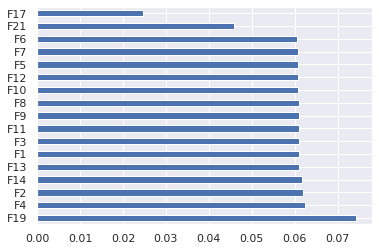

In [47]:
plt = ranked_features.nlargest(18).plot(kind='barh')
plt.show() 

In [48]:
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)
# Cross validation for evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf,x_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# ROC-AUC score and Accuracy on train data
print('Mean ROC AUC: %.5f' % mean(scores))
y_train_pred = clf.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))
y_val_pred = clf.predict(x_val)
print('validation-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_val_pred)))
y_test_pred = clf.predict(x_test)

Mean ROC AUC: 0.64235
Training-set accuracy score: 0.7619
validation-set accuracy score: 0.7559


In [51]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     15221
           1       0.74      0.02      0.05      5015

    accuracy                           0.76     20236
   macro avg       0.75      0.51      0.45     20236
weighted avg       0.75      0.76      0.66     20236

